In [19]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score,classification_report

from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
import joblib

In [4]:
df = pd.read_csv('output.csv')
df

,sex,age,inmsupr,pneumonia,diabetes,asthma,copd,hypertension,cardiovascular,renal_chronic,obesity,tobacco,days_prior_to_treatment,covid_res,intubed,icu,dead
0,0,30,0,1,0,0,0,0,0,0,0,0,86,1,0,0,0
1,1,60,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1
2,0,47,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1
3,0,63,0,0,0,0,0,1,0,0,0,0,9,1,0,0,0
4,1,39,0,1,0,0,0,0,0,0,1,0,5,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87053,0,42,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0
87054,1,1,0,1,0,0,0,0,0,0,0,0,3,0,0,1,0
87055,1,55,0,1,0,0,0,0,0,0,1,0,57,0,0,0,0
87056,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [5]:
df=df.loc[df['covid_res']==1,['sex','age','inmsupr','pneumonia','diabetes','asthma','copd','hypertension','cardiovascular','renal_chronic','obesity','tobacco','days_prior_to_treatment','covid_res','intubed','icu','dead']]
df

,sex,age,inmsupr,pneumonia,diabetes,asthma,copd,hypertension,cardiovascular,renal_chronic,obesity,tobacco,days_prior_to_treatment,covid_res,intubed,icu,dead
0,0,30,0,1,0,0,0,0,0,0,0,0,86,1,0,0,0
1,1,60,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1
2,0,47,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1
3,0,63,0,0,0,0,0,1,0,0,0,0,9,1,0,0,0
4,1,39,0,1,0,0,0,0,0,0,1,0,5,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53550,0,58,0,1,0,0,0,0,0,0,0,0,4,1,1,1,1
53551,0,67,0,1,0,0,0,0,0,0,0,0,115,1,0,0,0
53552,0,65,0,1,1,0,0,1,0,0,1,0,4,1,1,1,0
53553,1,29,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0


Text(0.5, 1.0, 'icu')

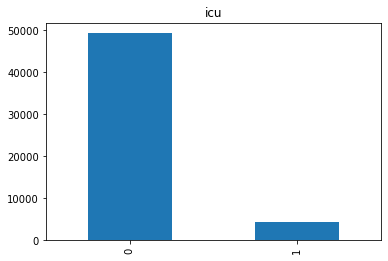

In [6]:
df['icu'].value_counts().sort_index().plot.bar()
plt.title('icu')

In [7]:
df.loc[df['dead']==1,'icu']=1
df.loc[df['intubed']==1,'icu']=1

In [8]:
X = df.drop(['dead','covid_res'], axis=1)

y = df['dead']

In [9]:
X

,sex,age,inmsupr,pneumonia,diabetes,asthma,copd,hypertension,cardiovascular,renal_chronic,obesity,tobacco,days_prior_to_treatment,intubed,icu
0,0,30,0,1,0,0,0,0,0,0,0,0,86,0,0
1,1,60,0,0,1,0,0,1,1,0,0,0,0,0,1
2,0,47,0,1,1,0,0,0,0,0,0,0,0,0,1
3,0,63,0,0,0,0,0,1,0,0,0,0,9,0,0
4,1,39,0,1,0,0,0,0,0,0,1,0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53550,0,58,0,1,0,0,0,0,0,0,0,0,4,1,1
53551,0,67,0,1,0,0,0,0,0,0,0,0,115,0,0
53552,0,65,0,1,1,0,0,1,0,0,1,0,4,1,1
53553,1,29,0,1,0,0,0,0,0,0,0,0,2,0,0


Text(0.5, 1.0, 'dead')

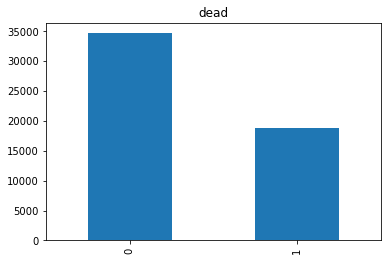

In [10]:
df['dead'].value_counts().sort_index().plot.bar()
plt.title('dead')

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=0,stratify=y_res)

In [13]:
def reports():
    print("train Accuracy = {}".format(accuracy_score(y_train, train_model.predict(X_train))))
    print("test Accuracy = {}".format(accuracy_score(y_test, test_model)))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, test_model))
    print("Classification Report")
    print(classification_report(y_test, test_model))
    
    

# # random forest 

In [13]:

train_model = RandomForestClassifier()
train_model.fit(X_train, y_train)
test_model = train_model.predict(X_test)

In [14]:
reports()

train Accuracy = 0.9931573198128568
test Accuracy = 0.952488578985333
Confusion Matrix
[[ 9667   731]
 [  257 10140]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     10398
           1       0.93      0.98      0.95     10397

    accuracy                           0.95     20795
   macro avg       0.95      0.95      0.95     20795
weighted avg       0.95      0.95      0.95     20795



# # svm


In [27]:
train_model = SVC()
train_model.fit(X_train, y_train)
test_model = train_model.predict(X_test)

In [28]:
reports()

train Accuracy = 0.9578721737875884
test Accuracy = 0.9581630199567204
Confusion Matrix
[[ 9560   838]
 [   32 10365]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10398
           1       0.93      1.00      0.96     10397

    accuracy                           0.96     20795
   macro avg       0.96      0.96      0.96     20795
weighted avg       0.96      0.96      0.96     20795



# # knn 


In [29]:
train_model = KNeighborsClassifier()
train_model.fit(X_train, y_train)
test_model =train_model.predict(X_test)

In [30]:
reports()

train Accuracy = 0.9607576413363836
test Accuracy = 0.9531137292618418
Confusion Matrix
[[ 9558   840]
 [  135 10262]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     10398
           1       0.92      0.99      0.95     10397

    accuracy                           0.95     20795
   macro avg       0.96      0.95      0.95     20795
weighted avg       0.96      0.95      0.95     20795



## gradient boosted trees

In [17]:
train_model = GradientBoostingClassifier()
train_model.fit(X_train, y_train)
test_model =train_model.predict(X_test)

In [18]:
reports()

train Accuracy = 0.958428656814856
test Accuracy = 0.9591247896128877
Confusion Matrix
[[ 9583   815]
 [   35 10362]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10398
           1       0.93      1.00      0.96     10397

    accuracy                           0.96     20795
   macro avg       0.96      0.96      0.96     20795
weighted avg       0.96      0.96      0.96     20795



# # adaboost

In [21]:
train_model = AdaBoostClassifier()
train_model.fit(X_train, y_train)
test_model =train_model.predict(X_test)

In [22]:
reports()

train Accuracy = 0.9571920278653723
test Accuracy = 0.9575378696802116
Confusion Matrix
[[ 9579   819]
 [   64 10333]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     10398
           1       0.93      0.99      0.96     10397

    accuracy                           0.96     20795
   macro avg       0.96      0.96      0.96     20795
weighted avg       0.96      0.96      0.96     20795



# # xgboost

In [25]:
train_model = XGBClassifier()
train_model.fit(X_train, y_train)
test_model =train_model.predict(X_test)

[12:48:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [26]:
reports()

train Accuracy = 0.9649209587996455
test Accuracy = 0.9584515508535706
Confusion Matrix
[[ 9632   766]
 [   98 10299]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     10398
           1       0.93      0.99      0.96     10397

    accuracy                           0.96     20795
   macro avg       0.96      0.96      0.96     20795
weighted avg       0.96      0.96      0.96     20795



In [16]:
model = Sequential()

# input layer
model.add(Input(shape=(15,)))

# hidden layers
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))

# output layer
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.Recall()])

In [17]:
history = model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=256,epochs=35)

Epoch 1/35
190/190 [==============================] - 2s 13ms/step - loss: 0.1969 - recall_2: 0.9897 - val_loss: 0.1328 - val_recall_2: 0.9986
Epoch 2/35
190/190 [==============================] - 2s 10ms/step - loss: 0.1322 - recall_2: 0.9983 - val_loss: 0.1304 - val_recall_2: 0.9971
Epoch 3/35
190/190 [==============================] - 2s 10ms/step - loss: 0.1305 - recall_2: 0.9971 - val_loss: 0.1303 - val_recall_2: 0.9994
Epoch 4/35
190/190 [==============================] - 2s 9ms/step - loss: 0.1300 - recall_2: 0.9976 - val_loss: 0.1294 - val_recall_2: 0.9941
Epoch 5/35
190/190 [==============================] - 2s 10ms/step - loss: 0.1299 - recall_2: 0.9965 - val_loss: 0.1305 - val_recall_2: 0.9979
Epoch 6/35
190/190 [==============================] - 2s 10ms/step - loss: 0.1297 - recall_2: 0.9963 - val_loss: 0.1297 - val_recall_2: 0.9891
Epoch 7/35
190/190 [==============================] - 2s 13ms/step - loss: 0.1287 - recall_2: 0.9954 - val_loss: 0.1299 - val_recall_2: 0.9990


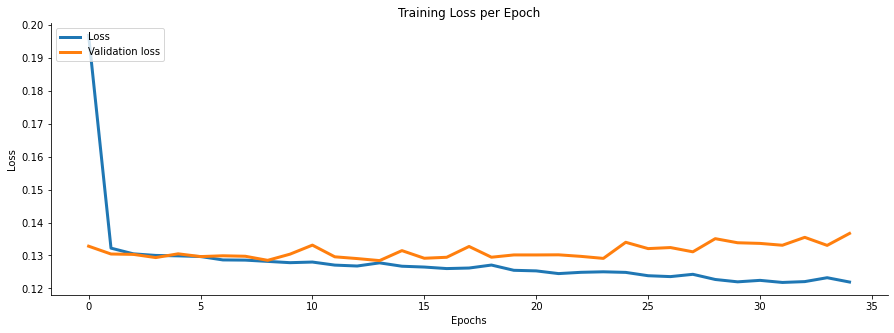

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,5))
plt.plot(loss,lw=3)
plt.plot(val_loss,lw=3)
plt.title('Training Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation loss'], loc='upper left')
sns.despine()

In [21]:
model.evaluate(X_test,y_test)
y_predicted = [1 if y >= 0.5 else 0 for y in model.predict(X_test).flatten()]
confusion_matrix_result = confusion_matrix(y_test,y_predicted)
confusion_matrix_result

650/650 [==============================] - 1s 2ms/step - loss: 0.1367 - recall_2: 0.9956


array([[ 9581,   817],
       [   46, 10351]], dtype=int64)